In [1]:
from sotip import *
import numpy as np
import scanpy as sc
import os

In [ ]:
# SOTIP result are obtained by running "search_xxx.py" in this dir, or using run_all.sh/run_all_reverse.sh for batch running


In [8]:
# these quantitative performances are from their original publications

spagcn_list = [
    0.488,
    0.432,
    0.441,
    0.449,
    0.245,
    0.369,
    0.517,
    0.572,
    0.525,
    0.389,
    0.461,
    0.348
]
stlearn_list = [
    0.456,
    0.295,
    0.423,
    0.496,
    0.337,
    0.186,
    0.281,
    0.344,
    0.366,
    0.395,
    0.418,
    0.360
]
bayesspace_list = [
    0.503,
    0.435,
    0.366,
    0.381,
    0.442,
    0.251,
    0.4,
    0.762,
    0.550,
    0.444,
    0.353,
    0.320
]
SEDR_list = [
    0.26, 0.33,0.39,0.395,0.40,0.42,0.425,0.43,0.46,0.48,0.49,0.58
]
Giotto_list = [
    0.22,0.25,0.32,0.34,0.36,0.37,0.38,0.4,0.42,0.46,0.47,0.375
]

STAGATE_list = [
    0.3, 0.32, 0.44,0.45,0.48,0.5,0.51,0.52,0.58,0.595,0.6,0.62
]

SpatialPCA_list = [
    0.375, 0.4,0.41, 0.51,0.52,0.54,0.55,0.555,0.58,0.59,0.6,0.62

]


sample_list = [
    151507,
    151508,
    151509,
    151510,
    151669,
    151670,
    151671,
    151672,
    151673,
    151674,
    151675,
    151676,
    
]

cls_num_list = [
    7,
    7,
    7,
    7,
    5,
    5,
    5,
    5,
    7,
    7,
    7,
    7,
    
]

In [13]:
df_ari

,Unnamed: 0,data_name,PCA,Cell_cls_knn,Cell_cls_res,ME_knn,EMD_neighbors,leiden_ari,sotip_ari
0,0,151508,50,15,2,50,400,0.292780,0.381179
1,1,151671,50,15,2,50,400,0.206840,0.384150
2,2,151507,50,15,2,50,400,0.300387,0.366818
3,3,151674,50,15,2,50,400,0.288386,0.284165
4,4,151670,50,15,2,50,400,0.077040,0.356513
...,...,...,...,...,...,...,...,...,...
355,7,151675,100,30,1,30,700,0.400091,0.578210
356,8,151509,100,30,1,30,700,0.300700,0.295892
357,9,151673,100,30,1,30,700,0.363421,0.542019
358,10,151672,100,30,1,30,700,0.369392,0.435176


In [3]:
rst_all = pd.read_csv('SpatialLIBD_search.csv')

In [4]:
rst_all_best = rst_all.groupby(by='sample').agg(['max'])['sotip_ari']

In [6]:
sotip_list = rst_all_best.values[:,0]


In [9]:
method_ari_dic = {
    # 'Number of clusters':cls_num_list,
    'StLearn':stlearn_list,
    
    'BayesSpace':bayesspace_list,
    'SpaGCN':spagcn_list,
    'Giotto':Giotto_list,
    'SEDR':SEDR_list,
    'STAGATE':STAGATE_list,
    'SpatialPCA':SpatialPCA_list,
    'SOTIP':sotip_list,
}

In [10]:
pd_dict = {
    'sample':[],
    'method':[],
    'ari':[]
}

In [11]:
for i in range(12):
    for method in method_ari_dic.keys():
        pd_dict['sample'].append(sample_list[i])
        pd_dict['method'].append(method)
        pd_dict['ari'].append(method_ari_dic[method][i])
        
pd_df = pd.DataFrame(pd_dict)      

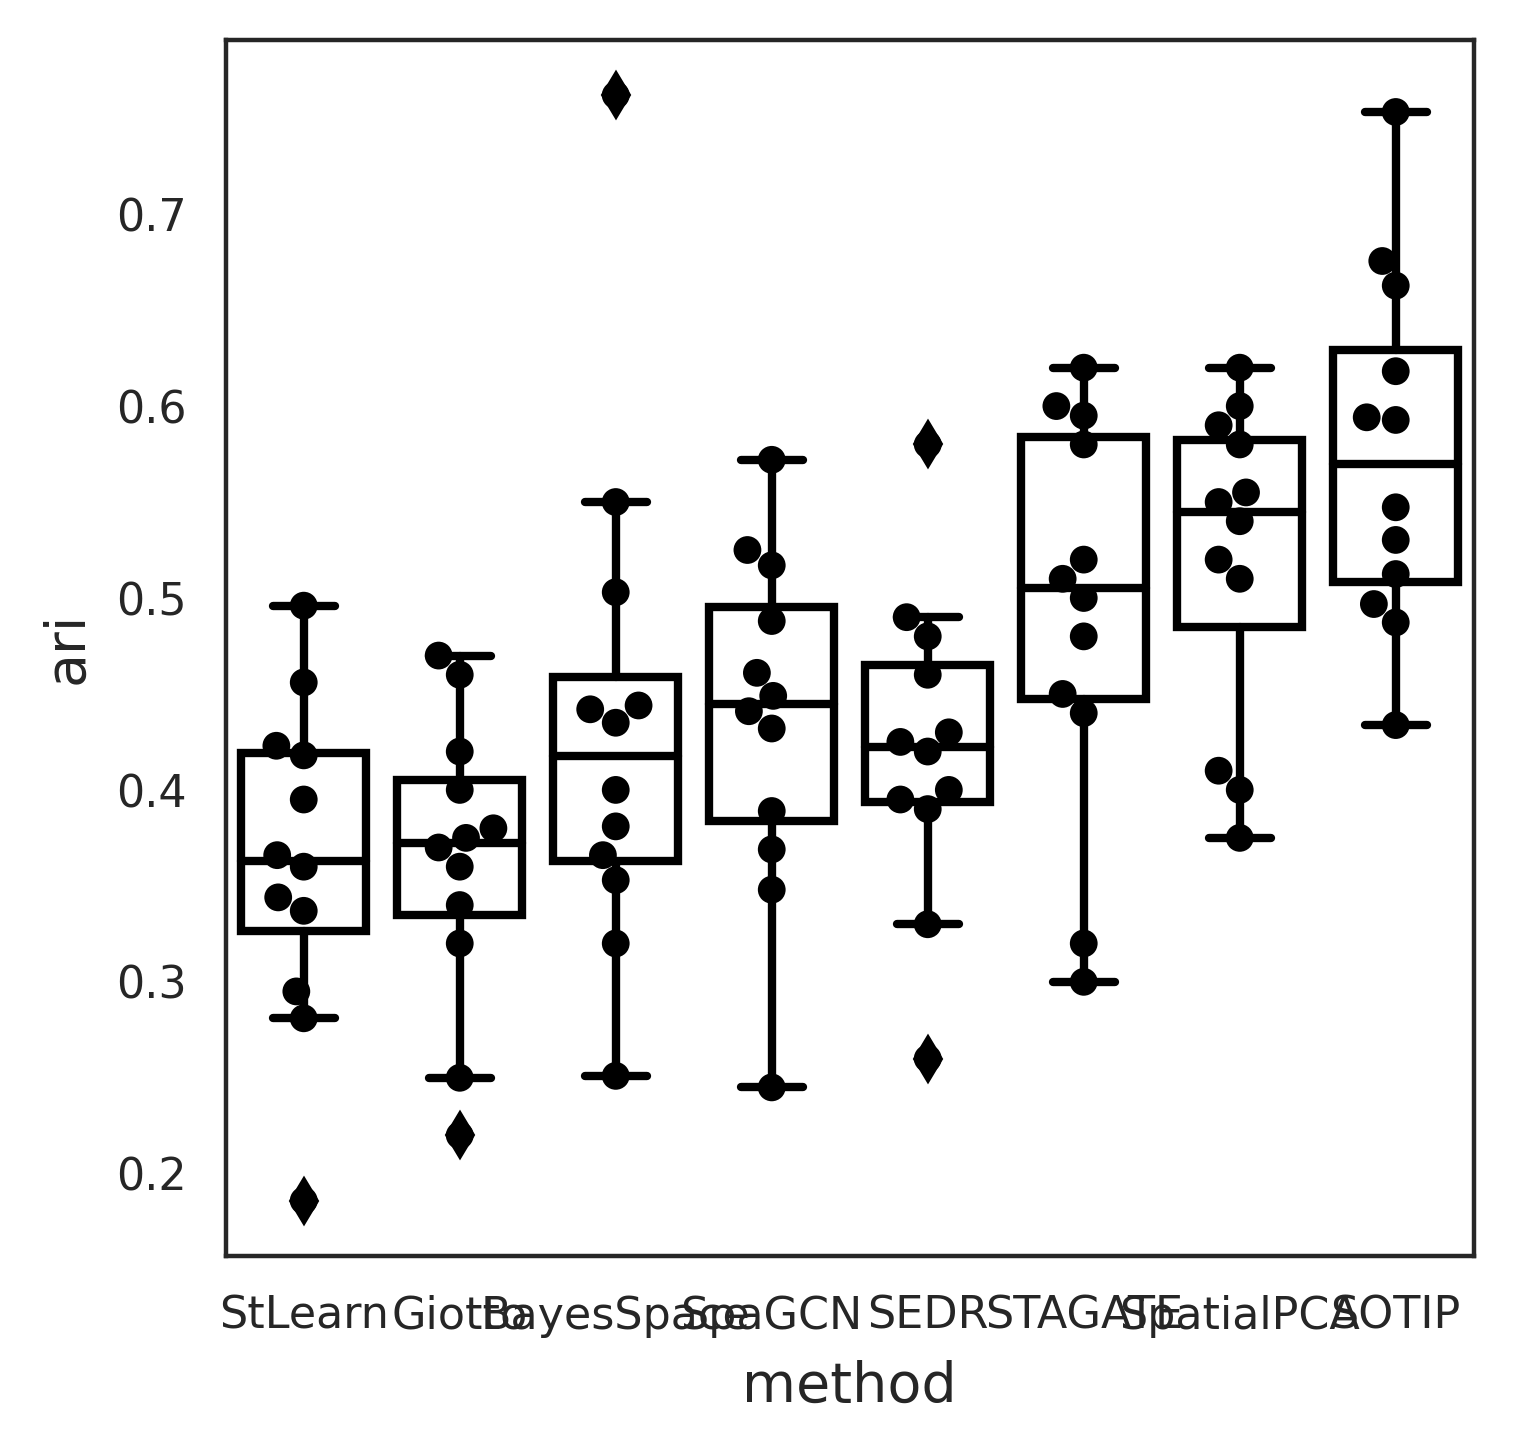

In [12]:
# sns.boxplot(data=pd_df,x='method',y='ari',)
pd_df = pd.DataFrame(pd_dict)
order = ['StLearn','Giotto','BayesSpace','SpaGCN','SEDR','STAGATE','SpatialPCA','SOTIP']
ax = sns.boxplot(x="method", y="ari", data=pd_df,color='k',order=order)
ax = sns.swarmplot(x="method", y="ari", data=pd_df,color='k',order=order)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
# plt.ylim(0.5, 1)